In [0]:
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

--2018-07-05 09:13:15--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar           54%[=========>          ] 412.57M  9.83MB/s    eta 39s    

images.tar          100%[===================>] 756.82M  6.46MB/s    in 84s     

2018-07-05 09:14:39 (8.98 MB/s) - ‘images.tar’ saved [793579520/793579520]



In [0]:
!tar -xvf images.tar

## First let's convert dataset into proper format so that the future training and testing processes can be made easier 

In [0]:
import os
import shutil

original_dataset_dir = 'Images'
basedir = 'dog_breeds'

os.mkdir(basedir)

train_dir = os.path.join(basedir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(basedir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(basedir, 'test')
os.mkdir(test_dir)

species_codes_names = os.listdir(original_dataset_dir)

for specie in species_codes_names:
  os.mkdir( os.path.join(train_dir, specie) )
  os.mkdir( os.path.join(validation_dir, specie) )
  os.mkdir( os.path.join(test_dir, specie) )
  pass

test_size = 0.3
validation_size = 0.2

for specie in species_codes_names:
  
  specie_dir = os.path.join(original_dataset_dir, specie)
  list_images_specie = os.listdir(specie_dir)
  
  fnames_test = list_images_specie[:int(test_size * len(list_images_specie))]
  for fname in fnames_test:
    src = os.path.join(specie_dir, fname)
    specie_test_dir = os.path.join(test_dir, specie)
    dest = os.path.join(specie_test_dir, fname)
    shutil.copyfile(src, dest)
    
  fnames_validation = list_images_specie[int(test_size * len(list_images_specie)) : int((test_size+validation_size) * len(list_images_specie))]
  for fname in fnames_validation:
    src = os.path.join(specie_dir, fname)
    specie_validation_dir = os.path.join(validation_dir, specie)
    dest = os.path.join(specie_validation_dir, fname)
    shutil.copyfile(src, dest)
    
  fnames_train = list_images_specie[int((test_size+validation_size) * len(list_images_specie)) : ]
  for fname in fnames_train:
    src = os.path.join(specie_dir, fname)
    specie_train_dir = os.path.join(train_dir, specie)
    dest = os.path.join(specie_train_dir, fname)
    shutil.copyfile(src, dest)

  
print("Number of images in each specie's directory:")
for specie in os.listdir(train_dir):
  print('Number of images for', specie, 'are', len( os.listdir( os.path.join(train_dir, specie) ) ))

In [0]:
num_classes = len( os.listdir(train_dir) )
input_shape = (150, 150, 3)

from keras import models
from keras import layers

model = models.Sequential()
model.add( layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape) )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Conv2D(64, (3, 3), activation='relu') )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Conv2D(128, (3, 3), activation='relu') )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Conv2D(128, (3, 3), activation='relu') )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Flatten() )
model.add( layers.Dense(512, activation='relu') )
model.add( layers.Dense(num_classes, activation='softmax') )

print(model.summary())

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 10316 images belonging to 120 classes.
Found 4142 images belonging to 120 classes.


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

model.save('dog_breeds_1.h5')

Epoch 1/30
100/100 [==============================] - 21s 209ms/step - loss: 4.7879 - acc: 0.0091 - val_loss: 4.7798 - val_acc: 0.0119
Epoch 2/30
100/100 [==============================] - 18s 184ms/step - loss: 4.7805 - acc: 0.0125 - val_loss: 4.7664 - val_acc: 0.0144
Epoch 3/30
100/100 [==============================] - 18s 184ms/step - loss: 4.7487 - acc: 0.0194 - val_loss: 4.7059 - val_acc: 0.0262
Epoch 4/30
 60/100 [=================>............] - ETA: 4s - loss: 4.6628 - acc: 0.0344

100/100 [==============================] - 18s 181ms/step - loss: 4.6366 - acc: 0.0347 - val_loss: 4.5823 - val_acc: 0.0331
Epoch 5/30
100/100 [==============================] - 18s 184ms/step - loss: 4.5079 - acc: 0.0478 - val_loss: 4.4981 - val_acc: 0.0369
Epoch 6/30
100/100 [==============================] - 18s 184ms/step - loss: 4.4491 - acc: 0.0406 - val_loss: 4.4333 - val_acc: 0.0450
Epoch 7/30
 80/100 [=======================>......] - ETA: 2s - loss: 4.3600 - acc: 0.0578

100/100 [==============================] - 18s 183ms/step - loss: 4.3470 - acc: 0.0606 - val_loss: 4.3980 - val_acc: 0.0506
Epoch 8/30
100/100 [==============================] - 18s 182ms/step - loss: 4.2838 - acc: 0.0722 - val_loss: 4.3767 - val_acc: 0.0512
Epoch 9/30
100/100 [==============================] - 18s 178ms/step - loss: 4.2459 - acc: 0.0688 - val_loss: 4.3853 - val_acc: 0.0531
Epoch 10/30
 83/100 [=======================>......] - ETA: 1s - loss: 4.1993 - acc: 0.0809

100/100 [==============================] - 18s 182ms/step - loss: 4.1796 - acc: 0.0809 - val_loss: 4.3486 - val_acc: 0.0631
Epoch 11/30
100/100 [==============================] - 18s 179ms/step - loss: 4.0878 - acc: 0.0913 - val_loss: 4.3072 - val_acc: 0.0700
Epoch 12/30
100/100 [==============================] - 18s 177ms/step - loss: 4.0820 - acc: 0.1025 - val_loss: 4.3129 - val_acc: 0.0550
Epoch 13/30
 86/100 [========================>.....] - ETA: 1s - loss: 4.0552 - acc: 0.0827

100/100 [==============================] - 18s 185ms/step - loss: 4.0350 - acc: 0.0893 - val_loss: 4.2745 - val_acc: 0.0594
Epoch 14/30
100/100 [==============================] - 18s 182ms/step - loss: 3.8954 - acc: 0.1279 - val_loss: 4.3375 - val_acc: 0.0525
Epoch 15/30
100/100 [==============================] - 18s 178ms/step - loss: 3.8890 - acc: 0.1225 - val_loss: 4.2573 - val_acc: 0.0781
Epoch 16/30
 84/100 [========================>.....] - ETA: 1s - loss: 3.8856 - acc: 0.1198

100/100 [==============================] - 18s 179ms/step - loss: 3.8807 - acc: 0.1244 - val_loss: 4.2883 - val_acc: 0.0688
Epoch 17/30
100/100 [==============================] - 18s 175ms/step - loss: 3.7463 - acc: 0.1447 - val_loss: 4.2824 - val_acc: 0.0800
Epoch 18/30
100/100 [==============================] - 18s 178ms/step - loss: 3.6784 - acc: 0.1588 - val_loss: 4.3640 - val_acc: 0.0737
Epoch 19/30
 83/100 [=======================>......] - ETA: 2s - loss: 3.6993 - acc: 0.1649

100/100 [==============================] - 18s 181ms/step - loss: 3.6877 - acc: 0.1619 - val_loss: 4.2903 - val_acc: 0.0844
Epoch 20/30
100/100 [==============================] - 18s 179ms/step - loss: 3.5311 - acc: 0.2002 - val_loss: 4.3183 - val_acc: 0.0762
Epoch 21/30
100/100 [==============================] - 18s 176ms/step - loss: 3.4418 - acc: 0.1997 - val_loss: 4.3304 - val_acc: 0.0794
Epoch 22/30
 86/100 [========================>.....] - ETA: 1s - loss: 3.5406 - acc: 0.1802

100/100 [==============================] - 18s 175ms/step - loss: 3.5383 - acc: 0.1816 - val_loss: 4.3781 - val_acc: 0.0750
Epoch 23/30
100/100 [==============================] - 17s 174ms/step - loss: 3.3303 - acc: 0.2159 - val_loss: 4.4097 - val_acc: 0.0794
Epoch 24/30
100/100 [==============================] - 18s 181ms/step - loss: 3.1912 - acc: 0.2456 - val_loss: 4.4753 - val_acc: 0.0775
Epoch 25/30
 83/100 [=======================>......] - ETA: 1s - loss: 3.2281 - acc: 0.2383

100/100 [==============================] - 17s 173ms/step - loss: 3.2284 - acc: 0.2384 - val_loss: 4.4019 - val_acc: 0.0881
Epoch 26/30
100/100 [==============================] - 17s 175ms/step - loss: 3.1819 - acc: 0.2501 - val_loss: 4.4869 - val_acc: 0.0806
Epoch 27/30
100/100 [==============================] - 17s 173ms/step - loss: 2.8536 - acc: 0.3169 - val_loss: 4.5881 - val_acc: 0.0750
Epoch 28/30
 83/100 [=======================>......] - ETA: 1s - loss: 2.9022 - acc: 0.3016

100/100 [==============================] - 17s 170ms/step - loss: 2.8909 - acc: 0.3025 - val_loss: 4.5905 - val_acc: 0.0825
Epoch 29/30
100/100 [==============================] - 17s 173ms/step - loss: 2.9648 - acc: 0.2906 - val_loss: 4.5823 - val_acc: 0.0869
Epoch 30/30
100/100 [==============================] - 18s 182ms/step - loss: 2.4731 - acc: 0.3952 - val_loss: 4.6802 - val_acc: 0.0869


In [0]:
def plot_from_history(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  
  epochs = range(1, len(acc)+1)
  
  from matplotlib import pyplot as plt
  
  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  
  plt.plot(epochs, acc, 'ro', label='Training Accuracy')
  plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

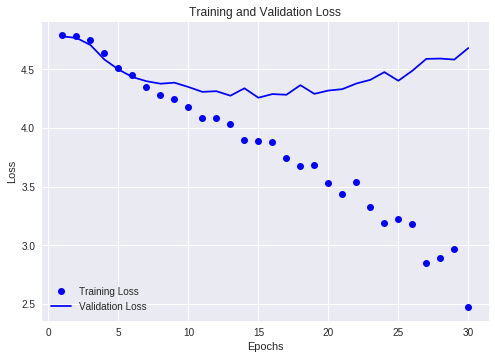

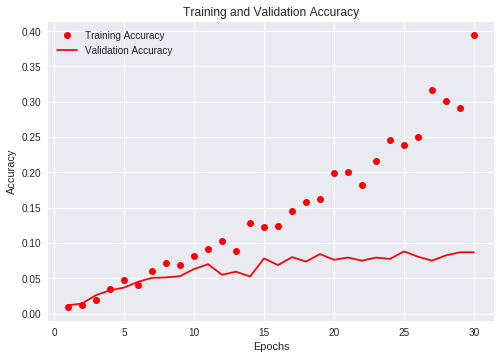

In [0]:
plot_from_history(history)

In [0]:
from google.colab import files
files.download('dog_breeds_1.h5')

In [0]:
os.listdir('.')

['datalab',
 'images.tar',
 '.keras',
 'dog_breeds_1.h5',
 'Images',
 '.ipython',
 '.forever',
 '.nv',
 '.cache',
 'dog_breeds',
 '.local',
 '.config']

In [0]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get update -qq 2>&1 > /dev/null
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

In [0]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

In [0]:
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
# Work around misordering of STREAM and STDIN in Jupyter.
# https://github.com/jupyter/notebook/issues/3159
prompt = !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass(prompt[0] + '\n\nEnter verification code: ')
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force

Enter verification code: ··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

print('Files in Drive:')
!ls drive/

# Create a file in Drive.
!echo "This newly created file will appear in your Drive file list." > drive/created.txt

Files in Drive:
CurrencyConversionApplication.zip  InvertedPendulumFreelancer.rar
Deep Learning with Python	   Manning Books
Getting started


In [0]:
os.listdir('.')

['datalab',
 '.gdfuse',
 'images.tar',
 '.keras',
 'drive',
 'dog_breeds_1.h5',
 'Images',
 '.ipython',
 '.forever',
 '.nv',
 '.cache',
 'dog_breeds',
 '.local',
 '.config']

In [0]:
models_dir = os.path.join('drive', 'models')
os.mkdir(models_dir)

src = 'dog_breeds_1.h5'
dest = os.path.join(models_dir, src)

shutil.copyfile(src, dest)

'drive/models/dog_breeds_1.h5'

Epoch 1/30
100/100 [==============================] - 22s 218ms/step - loss: 4.7872 - acc: 0.0122 - val_loss: 4.7829 - val_acc: 0.0119
Epoch 2/30
100/100 [==============================] - 21s 205ms/step - loss: 4.7724 - acc: 0.0106 - val_loss: 4.7447 - val_acc: 0.0238
Epoch 3/30
100/100 [==============================] - 20s 200ms/step - loss: 4.7047 - acc: 0.0228 - val_loss: 4.6794 - val_acc: 0.0231
Epoch 4/30
 65/100 [==================>...........] - ETA: 4s - loss: 4.6110 - acc: 0.0322

100/100 [==============================] - 20s 201ms/step - loss: 4.5851 - acc: 0.0350 - val_loss: 4.5730 - val_acc: 0.0294
Epoch 5/30
100/100 [==============================] - 20s 196ms/step - loss: 4.5069 - acc: 0.0397 - val_loss: 4.5138 - val_acc: 0.0387
Epoch 6/30
100/100 [==============================] - 20s 196ms/step - loss: 4.4717 - acc: 0.0434 - val_loss: 4.4545 - val_acc: 0.0431
Epoch 7/30
 84/100 [========================>.....] - ETA: 2s - loss: 4.3945 - acc: 0.0543

100/100 [==============================] - 19s 194ms/step - loss: 4.3784 - acc: 0.0531 - val_loss: 4.4370 - val_acc: 0.0494
Epoch 8/30
100/100 [==============================] - 19s 195ms/step - loss: 4.2793 - acc: 0.0675 - val_loss: 4.3803 - val_acc: 0.0544
Epoch 9/30
100/100 [==============================] - 19s 192ms/step - loss: 4.2486 - acc: 0.0575 - val_loss: 4.3837 - val_acc: 0.0519
Epoch 10/30
 86/100 [========================>.....] - ETA: 1s - loss: 4.2177 - acc: 0.0759

100/100 [==============================] - 20s 198ms/step - loss: 4.1946 - acc: 0.0772 - val_loss: 4.3563 - val_acc: 0.0512
Epoch 11/30
100/100 [==============================] - 20s 197ms/step - loss: 4.0976 - acc: 0.0916 - val_loss: 4.3084 - val_acc: 0.0619
Epoch 12/30
100/100 [==============================] - 19s 195ms/step - loss: 4.0114 - acc: 0.1031 - val_loss: 4.3195 - val_acc: 0.0669
Epoch 13/30
 86/100 [========================>.....] - ETA: 1s - loss: 4.0752 - acc: 0.0927

100/100 [==============================] - 20s 197ms/step - loss: 4.0318 - acc: 0.0981 - val_loss: 4.3602 - val_acc: 0.0644
Epoch 14/30
100/100 [==============================] - 19s 194ms/step - loss: 3.8407 - acc: 0.1231 - val_loss: 4.3107 - val_acc: 0.0650
Epoch 15/30
100/100 [==============================] - 19s 193ms/step - loss: 3.8277 - acc: 0.1291 - val_loss: 4.2780 - val_acc: 0.0725
Epoch 16/30
 86/100 [========================>.....] - ETA: 1s - loss: 3.8479 - acc: 0.1283

100/100 [==============================] - 20s 197ms/step - loss: 3.8560 - acc: 0.1224 - val_loss: 4.2373 - val_acc: 0.0788
Epoch 17/30
100/100 [==============================] - 21s 205ms/step - loss: 3.6236 - acc: 0.1691 - val_loss: 4.3108 - val_acc: 0.0700
Epoch 18/30
100/100 [==============================] - 19s 194ms/step - loss: 3.5889 - acc: 0.1739 - val_loss: 4.4395 - val_acc: 0.0756
Epoch 19/30
 86/100 [========================>.....] - ETA: 1s - loss: 3.5476 - acc: 0.1890

100/100 [==============================] - 20s 198ms/step - loss: 3.5502 - acc: 0.1894 - val_loss: 4.3651 - val_acc: 0.0669
Epoch 20/30
100/100 [==============================] - 20s 196ms/step - loss: 3.3399 - acc: 0.2105 - val_loss: 4.3422 - val_acc: 0.0806
Epoch 21/30
100/100 [==============================] - 19s 195ms/step - loss: 3.2487 - acc: 0.2406 - val_loss: 4.4182 - val_acc: 0.0694
Epoch 22/30
 86/100 [========================>.....] - ETA: 1s - loss: 3.2690 - acc: 0.2340

100/100 [==============================] - 20s 197ms/step - loss: 3.2616 - acc: 0.2303 - val_loss: 4.4405 - val_acc: 0.0819
Epoch 23/30
100/100 [==============================] - 20s 200ms/step - loss: 3.1565 - acc: 0.2544 - val_loss: 4.5689 - val_acc: 0.0800
Epoch 24/30
100/100 [==============================] - 20s 202ms/step - loss: 2.8641 - acc: 0.3056 - val_loss: 4.5230 - val_acc: 0.0875
Epoch 25/30
 86/100 [========================>.....] - ETA: 1s - loss: 2.8595 - acc: 0.3049

100/100 [==============================] - 20s 205ms/step - loss: 2.8510 - acc: 0.3081 - val_loss: 4.5564 - val_acc: 0.0800
Epoch 26/30
100/100 [==============================] - 20s 196ms/step - loss: 2.8064 - acc: 0.3195 - val_loss: 4.7037 - val_acc: 0.0912
Epoch 27/30
100/100 [==============================] - 20s 197ms/step - loss: 2.3784 - acc: 0.4134 - val_loss: 4.7837 - val_acc: 0.0819
Epoch 28/30
 86/100 [========================>.....] - ETA: 1s - loss: 2.4121 - acc: 0.4062

100/100 [==============================] - 20s 195ms/step - loss: 2.4204 - acc: 0.4022 - val_loss: 4.8133 - val_acc: 0.0844
Epoch 29/30
100/100 [==============================] - 19s 189ms/step - loss: 2.4861 - acc: 0.3937 - val_loss: 4.7779 - val_acc: 0.0881
Epoch 30/30
100/100 [==============================] - 20s 202ms/step - loss: 1.8314 - acc: 0.5504 - val_loss: 5.2414 - val_acc: 0.0850


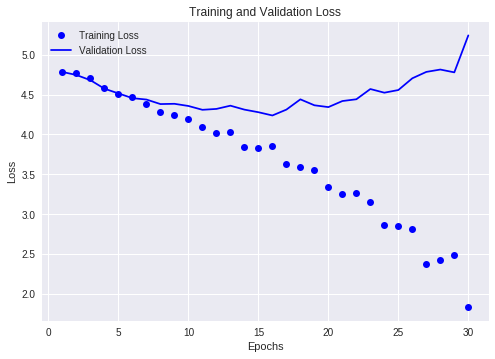

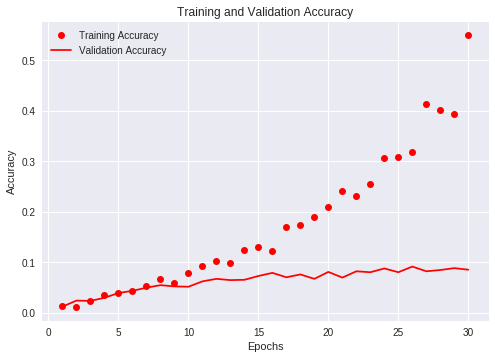

In [0]:
model2 = models.Sequential()
model2.add( layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape) )
model2.add( layers.MaxPooling2D((2, 2)) )
model2.add( layers.Conv2D(128, (3, 3), activation='relu') )
model2.add( layers.MaxPooling2D((2, 2)) )
model2.add( layers.Conv2D(256, (3, 3), activation='relu', input_shape=input_shape) )
model2.add( layers.MaxPooling2D((2, 2)) )
model2.add( layers.Conv2D(256, (3, 3), activation='relu', input_shape=input_shape) )
model2.add( layers.MaxPooling2D((2, 2)) )
model2.add( layers.Flatten() )
model2.add( layers.Dense(256, activation='relu') )
model2.add( layers.Dense(num_classes, activation='softmax') )

model2.compile(optimizer=optimizers.RMSprop(lr=1e-4),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history2 = model2.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

model.save('dog_breeds_2.h5')

plot_from_history(history2)

Epoch 1/60
100/100 [==============================] - 22s 223ms/step - loss: 4.7893 - acc: 0.0109 - val_loss: 4.7837 - val_acc: 0.0131
Epoch 2/60
100/100 [==============================] - 20s 203ms/step - loss: 4.7818 - acc: 0.0131 - val_loss: 4.7743 - val_acc: 0.0131
Epoch 3/60
100/100 [==============================] - 21s 206ms/step - loss: 4.7531 - acc: 0.0184 - val_loss: 4.7296 - val_acc: 0.0169
Epoch 4/60
 64/100 [==================>...........] - ETA: 5s - loss: 4.6931 - acc: 0.0176

100/100 [==============================] - 21s 207ms/step - loss: 4.6665 - acc: 0.0242 - val_loss: 4.6538 - val_acc: 0.0231
Epoch 5/60
100/100 [==============================] - 21s 207ms/step - loss: 4.6127 - acc: 0.0303 - val_loss: 4.5704 - val_acc: 0.0275
Epoch 6/60
100/100 [==============================] - 21s 208ms/step - loss: 4.5413 - acc: 0.0300 - val_loss: 4.4969 - val_acc: 0.0269
Epoch 7/60
 83/100 [=======================>......] - ETA: 2s - loss: 4.4452 - acc: 0.0467

100/100 [==============================] - 20s 204ms/step - loss: 4.4446 - acc: 0.0461 - val_loss: 4.4443 - val_acc: 0.0381
Epoch 8/60
100/100 [==============================] - 20s 205ms/step - loss: 4.3599 - acc: 0.0553 - val_loss: 4.3827 - val_acc: 0.0437
Epoch 9/60
100/100 [==============================] - 20s 201ms/step - loss: 4.3417 - acc: 0.0581 - val_loss: 4.3506 - val_acc: 0.0425
Epoch 10/60
 86/100 [========================>.....] - ETA: 1s - loss: 4.2651 - acc: 0.0678

100/100 [==============================] - 20s 202ms/step - loss: 4.2387 - acc: 0.0702 - val_loss: 4.3770 - val_acc: 0.0488
Epoch 11/60
100/100 [==============================] - 20s 201ms/step - loss: 4.1708 - acc: 0.0822 - val_loss: 4.3154 - val_acc: 0.0563
Epoch 12/60
100/100 [==============================] - 20s 200ms/step - loss: 4.1431 - acc: 0.0728 - val_loss: 4.2883 - val_acc: 0.0581
Epoch 13/60
 86/100 [========================>.....] - ETA: 1s - loss: 4.1486 - acc: 0.0727

100/100 [==============================] - 20s 199ms/step - loss: 4.1356 - acc: 0.0750 - val_loss: 4.3227 - val_acc: 0.0600
Epoch 14/60
100/100 [==============================] - 20s 203ms/step - loss: 3.9950 - acc: 0.1028 - val_loss: 4.3078 - val_acc: 0.0587
Epoch 15/60
100/100 [==============================] - 20s 200ms/step - loss: 3.9870 - acc: 0.1029 - val_loss: 4.4549 - val_acc: 0.0563
Epoch 16/60
 86/100 [========================>.....] - ETA: 1s - loss: 3.9839 - acc: 0.1039

100/100 [==============================] - 20s 203ms/step - loss: 3.9776 - acc: 0.1050 - val_loss: 4.2726 - val_acc: 0.0688
Epoch 17/60
100/100 [==============================] - 21s 212ms/step - loss: 3.8008 - acc: 0.1334 - val_loss: 4.2787 - val_acc: 0.0700
Epoch 18/60
100/100 [==============================] - 20s 205ms/step - loss: 3.8321 - acc: 0.1203 - val_loss: 4.3013 - val_acc: 0.0612
Epoch 19/60
 86/100 [========================>.....] - ETA: 1s - loss: 3.8229 - acc: 0.1300

100/100 [==============================] - 20s 200ms/step - loss: 3.8140 - acc: 0.1352 - val_loss: 4.2376 - val_acc: 0.0675
Epoch 20/60
100/100 [==============================] - 21s 206ms/step - loss: 3.6574 - acc: 0.1646 - val_loss: 4.3582 - val_acc: 0.0725
Epoch 21/60
100/100 [==============================] - 20s 199ms/step - loss: 3.6125 - acc: 0.1731 - val_loss: 4.3090 - val_acc: 0.0719
Epoch 22/60
 86/100 [========================>.....] - ETA: 1s - loss: 3.5773 - acc: 0.1770

100/100 [==============================] - 20s 205ms/step - loss: 3.5835 - acc: 0.1800 - val_loss: 4.3121 - val_acc: 0.0788
Epoch 23/60
100/100 [==============================] - 20s 203ms/step - loss: 3.5723 - acc: 0.1725 - val_loss: 4.2878 - val_acc: 0.0750
Epoch 24/60
100/100 [==============================] - 20s 202ms/step - loss: 3.3652 - acc: 0.2059 - val_loss: 4.3973 - val_acc: 0.0731
Epoch 25/60
 86/100 [========================>.....] - ETA: 1s - loss: 3.3754 - acc: 0.2082

100/100 [==============================] - 21s 208ms/step - loss: 3.3976 - acc: 0.2028 - val_loss: 4.2836 - val_acc: 0.0906
Epoch 26/60
100/100 [==============================] - 20s 201ms/step - loss: 3.3674 - acc: 0.2141 - val_loss: 4.3656 - val_acc: 0.0844
Epoch 27/60
100/100 [==============================] - 20s 199ms/step - loss: 3.0681 - acc: 0.2680 - val_loss: 4.4217 - val_acc: 0.0775
Epoch 28/60
 85/100 [========================>.....] - ETA: 2s - loss: 3.1294 - acc: 0.2559

100/100 [==============================] - 20s 202ms/step - loss: 3.1542 - acc: 0.2503 - val_loss: 4.3226 - val_acc: 0.0938
Epoch 29/60
100/100 [==============================] - 20s 204ms/step - loss: 3.1547 - acc: 0.2462 - val_loss: 4.4241 - val_acc: 0.0825
Epoch 30/60
100/100 [==============================] - 21s 210ms/step - loss: 2.8168 - acc: 0.3150 - val_loss: 4.4890 - val_acc: 0.0887
Epoch 31/60
 86/100 [========================>.....] - ETA: 1s - loss: 2.8462 - acc: 0.3096

100/100 [==============================] - 20s 204ms/step - loss: 2.8576 - acc: 0.3066 - val_loss: 4.4966 - val_acc: 0.0950
Epoch 32/60
100/100 [==============================] - 20s 202ms/step - loss: 2.8916 - acc: 0.2999 - val_loss: 4.5021 - val_acc: 0.0831
Epoch 33/60
100/100 [==============================] - 20s 203ms/step - loss: 2.6140 - acc: 0.3628 - val_loss: 4.6779 - val_acc: 0.0856
Epoch 34/60
 86/100 [========================>.....] - ETA: 1s - loss: 2.5675 - acc: 0.3659

100/100 [==============================] - 20s 201ms/step - loss: 2.5601 - acc: 0.3697 - val_loss: 4.6429 - val_acc: 0.0906
Epoch 35/60
100/100 [==============================] - 21s 205ms/step - loss: 2.5858 - acc: 0.3594 - val_loss: 4.6998 - val_acc: 0.0938
Epoch 36/60
100/100 [==============================] - 21s 206ms/step - loss: 2.4167 - acc: 0.3897 - val_loss: 4.9724 - val_acc: 0.0938
Epoch 37/60
 86/100 [========================>.....] - ETA: 1s - loss: 2.2223 - acc: 0.4348

100/100 [==============================] - 20s 201ms/step - loss: 2.2405 - acc: 0.4308 - val_loss: 4.6997 - val_acc: 0.0813
Epoch 38/60
100/100 [==============================] - 20s 204ms/step - loss: 2.2749 - acc: 0.4269 - val_loss: 4.7450 - val_acc: 0.0956
Epoch 39/60
100/100 [==============================] - 20s 203ms/step - loss: 2.1672 - acc: 0.4487 - val_loss: 5.0281 - val_acc: 0.0925
Epoch 40/60
 86/100 [========================>.....] - ETA: 1s - loss: 1.8295 - acc: 0.5247

100/100 [==============================] - 21s 206ms/step - loss: 1.8469 - acc: 0.5205 - val_loss: 5.1717 - val_acc: 0.0900
Epoch 41/60
100/100 [==============================] - 21s 211ms/step - loss: 1.9551 - acc: 0.5022 - val_loss: 5.0513 - val_acc: 0.0931
Epoch 42/60
100/100 [==============================] - 20s 204ms/step - loss: 2.0181 - acc: 0.4734 - val_loss: 5.0153 - val_acc: 0.1000
Epoch 43/60
 86/100 [========================>.....] - ETA: 1s - loss: 1.4923 - acc: 0.6043

100/100 [==============================] - 21s 205ms/step - loss: 1.5116 - acc: 0.5981 - val_loss: 5.4333 - val_acc: 0.1019
Epoch 44/60
100/100 [==============================] - 21s 207ms/step - loss: 1.6558 - acc: 0.5631 - val_loss: 5.5108 - val_acc: 0.0856
Epoch 45/60
100/100 [==============================] - 21s 206ms/step - loss: 1.6486 - acc: 0.5576 - val_loss: 5.3812 - val_acc: 0.0938
Epoch 46/60
 86/100 [========================>.....] - ETA: 1s - loss: 1.4275 - acc: 0.6235

100/100 [==============================] - 21s 206ms/step - loss: 1.4038 - acc: 0.6281 - val_loss: 5.7023 - val_acc: 0.0906
Epoch 47/60
100/100 [==============================] - 20s 205ms/step - loss: 1.2781 - acc: 0.6591 - val_loss: 5.7339 - val_acc: 0.0975
Epoch 48/60
100/100 [==============================] - 20s 205ms/step - loss: 1.4195 - acc: 0.6287 - val_loss: 5.7852 - val_acc: 0.0988
Epoch 49/60
 86/100 [========================>.....] - ETA: 1s - loss: 1.2293 - acc: 0.6716

100/100 [==============================] - 20s 205ms/step - loss: 1.2032 - acc: 0.6807 - val_loss: 5.9645 - val_acc: 0.0944
Epoch 50/60
100/100 [==============================] - 21s 209ms/step - loss: 1.0631 - acc: 0.6972 - val_loss: 6.1902 - val_acc: 0.0881
Epoch 51/60
100/100 [==============================] - 21s 206ms/step - loss: 1.1159 - acc: 0.6944 - val_loss: 6.1372 - val_acc: 0.0956
Epoch 52/60
 86/100 [========================>.....] - ETA: 1s - loss: 1.0653 - acc: 0.7089

100/100 [==============================] - 21s 207ms/step - loss: 1.0113 - acc: 0.7238 - val_loss: 6.3523 - val_acc: 0.0950
Epoch 53/60
100/100 [==============================] - 21s 209ms/step - loss: 0.8556 - acc: 0.7538 - val_loss: 6.3703 - val_acc: 0.0912
Epoch 54/60
100/100 [==============================] - 20s 204ms/step - loss: 0.9073 - acc: 0.7406 - val_loss: 6.4023 - val_acc: 0.0963
Epoch 55/60
 85/100 [========================>.....] - ETA: 1s - loss: 0.9267 - acc: 0.7327

100/100 [==============================] - 20s 201ms/step - loss: 0.9097 - acc: 0.7391 - val_loss: 6.5431 - val_acc: 0.1006
Epoch 56/60
100/100 [==============================] - 21s 206ms/step - loss: 0.6206 - acc: 0.8253 - val_loss: 6.8588 - val_acc: 0.0969
Epoch 57/60
100/100 [==============================] - 21s 209ms/step - loss: 0.6948 - acc: 0.7997 - val_loss: 7.0842 - val_acc: 0.0963
Epoch 58/60
 86/100 [========================>.....] - ETA: 1s - loss: 0.7823 - acc: 0.7729

100/100 [==============================] - 21s 210ms/step - loss: 0.7910 - acc: 0.7715 - val_loss: 6.8979 - val_acc: 0.0862
Epoch 59/60
100/100 [==============================] - 22s 222ms/step - loss: 0.5768 - acc: 0.8306 - val_loss: 7.1051 - val_acc: 0.0969
Epoch 60/60
100/100 [==============================] - 21s 208ms/step - loss: 0.5498 - acc: 0.8416 - val_loss: 7.3167 - val_acc: 0.0969


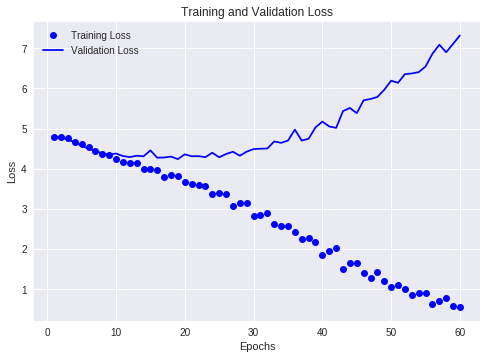

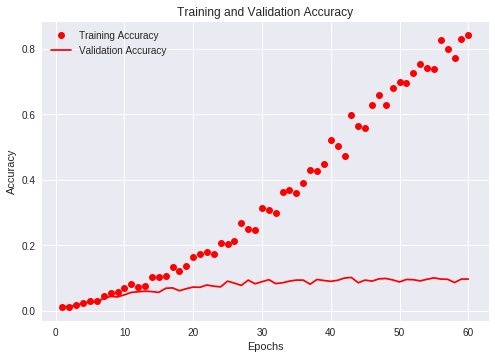

In [0]:
model3 = models.Sequential()
model3.add( layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape) )
model3.add( layers.MaxPooling2D((2, 2)) )
model3.add( layers.Conv2D(128, (3, 3), activation='relu') )
model3.add( layers.MaxPooling2D((2, 2)) )
model3.add( layers.Conv2D(256, (3, 3), activation='relu', input_shape=input_shape) )
model3.add( layers.MaxPooling2D((2, 2)) )
model3.add( layers.Conv2D(256, (3, 3), activation='relu', input_shape=input_shape) )
model3.add( layers.MaxPooling2D((2, 2)) )
model3.add( layers.Dropout(0.4) )
model3.add( layers.Flatten() )
model3.add( layers.Dense(256, activation='relu') )
model3.add( layers.Dense(num_classes, activation='softmax') )

model3.compile(optimizer=optimizers.RMSprop(lr=1e-4),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history3 = model3.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=60,
    validation_data=validation_generator,
    validation_steps=50
)

model.save('dog_breeds_3.h5')

plot_from_history(history3)

In [0]:
model4 = models.Sequential()
model4.add( layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape) )
model4.add( layers.MaxPooling2D((2, 2)) )
model4.add( layers.Conv2D(128, (3, 3), activation='relu') )
model4.add( layers.MaxPooling2D((2, 2)) )
model4.add( layers.Conv2D(256, (3, 3), activation='relu', input_shape=input_shape) )
model4.add( layers.MaxPooling2D((2, 2)) )
model4.add( layers.Conv2D(256, (3, 3), activation='relu', input_shape=input_shape) )
model4.add( layers.MaxPooling2D((2, 2)) )
model4.add( layers.Dropout(0.5) )
model4.add( layers.Flatten() )
model4.add( layers.Dense(256, activation='relu') )
model4.add( layers.Dense(num_classes, activation='softmax') )

model4.compile(optimizer=optimizers.RMSprop(lr=1e-4),
               loss='categorical_crossentropy',
               metrics=['accuracy'])


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

history4 = model4.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

plot_from_history(history4)

model3.save('dog_breeds_4.h5')
model3.save('drive/models/dog_breeds_4.h5')

Found 10316 images belonging to 120 classes.
Found 4142 images belonging to 120 classes.
Epoch 1/100
100/100 [==============================] - 41s 407ms/step - loss: 4.7891 - acc: 0.0075 - val_loss: 4.7850 - val_acc: 0.0194
Epoch 2/100
100/100 [==============================] - 38s 380ms/step - loss: 4.7859 - acc: 0.0063 - val_loss: 4.7812 - val_acc: 0.0112
Epoch 3/100
100/100 [==============================] - 38s 377ms/step - loss: 4.7707 - acc: 0.0153 - val_loss: 4.7592 - val_acc: 0.0100
Epoch 4/100
  7/100 [=>............................] - ETA: 12s - loss: 4.7675 - acc: 0.0134

100/100 [==============================] - 38s 375ms/step - loss: 4.7444 - acc: 0.0153 - val_loss: 4.7265 - val_acc: 0.0194
Epoch 5/100
100/100 [==============================] - 37s 372ms/step - loss: 4.7171 - acc: 0.0197 - val_loss: 4.7056 - val_acc: 0.0262
Epoch 6/100
100/100 [==============================] - 38s 376ms/step - loss: 4.7017 - acc: 0.0184 - val_loss: 4.6683 - val_acc: 0.0194
Epoch 7/100
 73/100 [====================>.........] - ETA: 7s - loss: 4.6891 - acc: 0.0193

100/100 [==============================] - 37s 370ms/step - loss: 4.6786 - acc: 0.0203 - val_loss: 4.6697 - val_acc: 0.0275
Epoch 8/100
100/100 [==============================] - 38s 377ms/step - loss: 4.6345 - acc: 0.0234 - val_loss: 4.5945 - val_acc: 0.0294
Epoch 9/100
100/100 [==============================] - 38s 376ms/step - loss: 4.6357 - acc: 0.0241 - val_loss: 4.5812 - val_acc: 0.0288
Epoch 10/100
 83/100 [=======================>......] - ETA: 4s - loss: 4.6043 - acc: 0.0236

100/100 [==============================] - 38s 378ms/step - loss: 4.6009 - acc: 0.0224 - val_loss: 4.5196 - val_acc: 0.0387
Epoch 11/100
100/100 [==============================] - 37s 374ms/step - loss: 4.5848 - acc: 0.0269 - val_loss: 4.5386 - val_acc: 0.0394
Epoch 12/100
100/100 [==============================] - 38s 378ms/step - loss: 4.5533 - acc: 0.0334 - val_loss: 4.5249 - val_acc: 0.0375
Epoch 13/100
 84/100 [========================>.....] - ETA: 4s - loss: 4.5464 - acc: 0.0339

100/100 [==============================] - 38s 377ms/step - loss: 4.5352 - acc: 0.0331 - val_loss: 4.4424 - val_acc: 0.0350
Epoch 14/100
100/100 [==============================] - 38s 378ms/step - loss: 4.5049 - acc: 0.0325 - val_loss: 4.4099 - val_acc: 0.0450
Epoch 15/100
100/100 [==============================] - 38s 377ms/step - loss: 4.4734 - acc: 0.0438 - val_loss: 4.4168 - val_acc: 0.0450
Epoch 16/100
 84/100 [========================>.....] - ETA: 4s - loss: 4.4754 - acc: 0.0357

100/100 [==============================] - 38s 376ms/step - loss: 4.4877 - acc: 0.0338 - val_loss: 4.4579 - val_acc: 0.0431
Epoch 17/100
100/100 [==============================] - 38s 378ms/step - loss: 4.4510 - acc: 0.0397 - val_loss: 4.3995 - val_acc: 0.0481
Epoch 18/100
100/100 [==============================] - 37s 374ms/step - loss: 4.4557 - acc: 0.0413 - val_loss: 4.3746 - val_acc: 0.0512
Epoch 19/100
 84/100 [========================>.....] - ETA: 4s - loss: 4.4456 - acc: 0.0428

100/100 [==============================] - 38s 378ms/step - loss: 4.4464 - acc: 0.0422 - val_loss: 4.3670 - val_acc: 0.0563
Epoch 20/100
100/100 [==============================] - 38s 375ms/step - loss: 4.4076 - acc: 0.0443 - val_loss: 4.3832 - val_acc: 0.0563
Epoch 21/100
100/100 [==============================] - 37s 374ms/step - loss: 4.3902 - acc: 0.0497 - val_loss: 4.3281 - val_acc: 0.0600
Epoch 22/100
 84/100 [========================>.....] - ETA: 4s - loss: 4.3880 - acc: 0.0495

100/100 [==============================] - 37s 371ms/step - loss: 4.3895 - acc: 0.0475 - val_loss: 4.3206 - val_acc: 0.0537
Epoch 23/100
100/100 [==============================] - 38s 379ms/step - loss: 4.3807 - acc: 0.0434 - val_loss: 4.3262 - val_acc: 0.0537
Epoch 24/100
100/100 [==============================] - 38s 377ms/step - loss: 4.3318 - acc: 0.0550 - val_loss: 4.2561 - val_acc: 0.0675
Epoch 25/100
 84/100 [========================>.....] - ETA: 4s - loss: 4.3436 - acc: 0.0525

100/100 [==============================] - 38s 383ms/step - loss: 4.3485 - acc: 0.0522 - val_loss: 4.2827 - val_acc: 0.0719
Epoch 26/100
100/100 [==============================] - 38s 382ms/step - loss: 4.3233 - acc: 0.0569 - val_loss: 4.2422 - val_acc: 0.0669
Epoch 27/100
100/100 [==============================] - 38s 379ms/step - loss: 4.3123 - acc: 0.0587 - val_loss: 4.2407 - val_acc: 0.0712
Epoch 28/100
 84/100 [========================>.....] - ETA: 4s - loss: 4.2989 - acc: 0.0618

100/100 [==============================] - 38s 379ms/step - loss: 4.3002 - acc: 0.0613 - val_loss: 4.2245 - val_acc: 0.0731
Epoch 29/100
100/100 [==============================] - 37s 367ms/step - loss: 4.2773 - acc: 0.0583 - val_loss: 4.1588 - val_acc: 0.0781
Epoch 30/100
100/100 [==============================] - 39s 394ms/step - loss: 4.2657 - acc: 0.0634 - val_loss: 4.2166 - val_acc: 0.0725
Epoch 31/100
 84/100 [========================>.....] - ETA: 4s - loss: 4.2373 - acc: 0.0670

100/100 [==============================] - 38s 375ms/step - loss: 4.2517 - acc: 0.0652 - val_loss: 4.1923 - val_acc: 0.0794
Epoch 32/100
100/100 [==============================] - 38s 377ms/step - loss: 4.2322 - acc: 0.0628 - val_loss: 4.1902 - val_acc: 0.0838
Epoch 33/100
100/100 [==============================] - 38s 379ms/step - loss: 4.1899 - acc: 0.0669 - val_loss: 4.1722 - val_acc: 0.0819
Epoch 34/100
 84/100 [========================>.....] - ETA: 4s - loss: 4.2094 - acc: 0.0755

100/100 [==============================] - 38s 377ms/step - loss: 4.1971 - acc: 0.0762 - val_loss: 4.1353 - val_acc: 0.0850
Epoch 35/100
100/100 [==============================] - 38s 376ms/step - loss: 4.2017 - acc: 0.0656 - val_loss: 4.1459 - val_acc: 0.0788
Epoch 36/100
100/100 [==============================] - 37s 374ms/step - loss: 4.1772 - acc: 0.0744 - val_loss: 4.1496 - val_acc: 0.0800
Epoch 37/100
 84/100 [========================>.....] - ETA: 4s - loss: 4.1548 - acc: 0.0811

100/100 [==============================] - 37s 370ms/step - loss: 4.1549 - acc: 0.0784 - val_loss: 4.1103 - val_acc: 0.0875
Epoch 38/100
100/100 [==============================] - 37s 368ms/step - loss: 4.1506 - acc: 0.0772 - val_loss: 4.1347 - val_acc: 0.0838
Epoch 39/100
100/100 [==============================] - 37s 373ms/step - loss: 4.1477 - acc: 0.0757 - val_loss: 4.1362 - val_acc: 0.0831
Epoch 40/100
 84/100 [========================>.....] - ETA: 4s - loss: 4.1105 - acc: 0.0795

100/100 [==============================] - 37s 366ms/step - loss: 4.1047 - acc: 0.0815 - val_loss: 4.1149 - val_acc: 0.0831
Epoch 41/100
100/100 [==============================] - 37s 372ms/step - loss: 4.1313 - acc: 0.0794 - val_loss: 4.1147 - val_acc: 0.0881
Epoch 42/100
100/100 [==============================] - 38s 376ms/step - loss: 4.0954 - acc: 0.0834 - val_loss: 4.1185 - val_acc: 0.0813
Epoch 43/100
 84/100 [========================>.....] - ETA: 4s - loss: 4.0793 - acc: 0.0938

100/100 [==============================] - 37s 370ms/step - loss: 4.0658 - acc: 0.0938 - val_loss: 4.1315 - val_acc: 0.0844
Epoch 44/100
100/100 [==============================] - 38s 376ms/step - loss: 4.0767 - acc: 0.0784 - val_loss: 4.1354 - val_acc: 0.0775
Epoch 45/100
100/100 [==============================] - 37s 372ms/step - loss: 4.0580 - acc: 0.0854 - val_loss: 4.0755 - val_acc: 0.0862
Epoch 46/100
 84/100 [========================>.....] - ETA: 4s - loss: 4.0452 - acc: 0.0934

100/100 [==============================] - 38s 380ms/step - loss: 4.0431 - acc: 0.0931 - val_loss: 4.0226 - val_acc: 0.1037
Epoch 47/100
100/100 [==============================] - 38s 376ms/step - loss: 4.0355 - acc: 0.0895 - val_loss: 4.0779 - val_acc: 0.0906
Epoch 48/100
100/100 [==============================] - 38s 376ms/step - loss: 4.0552 - acc: 0.0922 - val_loss: 4.1120 - val_acc: 0.0806
Epoch 49/100
 84/100 [========================>.....] - ETA: 4s - loss: 4.0180 - acc: 0.0926

100/100 [==============================] - 37s 373ms/step - loss: 4.0183 - acc: 0.0928 - val_loss: 4.1009 - val_acc: 0.0938
Epoch 50/100
 62/100 [=================>............] - ETA: 10s - loss: 4.0293 - acc: 0.1022

KeyboardInterrupt: ignored

In [0]:
model4.save('dog_breeds_4.h5')
model4.save('drive/models/dog_breeds_4.h5')

In [0]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

model = models.Sequential()
model.add( conv_base )
model.add( layers.Flatten() )
model.add( layers.Dense(256, activation='relu') )
model.add( layers.Dense(num_classes, activation='softmax') )

print( model.summary() )

58892288/58889256 [==============================] - 4s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_16 (Dense)             (None, 120)               30840     
Total params: 16,842,936
Trainable params: 16,842,936
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
conv_base.trainable = False

model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

model.save('dog_breeds_pretrained.h5')
model.save('drive/models/dog_breeds_pretrained.h5')

Epoch 1/30
100/100 [==============================] - 44s 443ms/step - loss: 4.8312 - acc: 0.0113 - val_loss: 4.7483 - val_acc: 0.0225
Epoch 2/30
100/100 [==============================] - 40s 405ms/step - loss: 4.7530 - acc: 0.0166 - val_loss: 4.6986 - val_acc: 0.0300
Epoch 3/30
100/100 [==============================] - 41s 411ms/step - loss: 4.7046 - acc: 0.0238 - val_loss: 4.6217 - val_acc: 0.0444
Epoch 4/30
 64/100 [==================>...........] - ETA: 10s - loss: 4.6320 - acc: 0.0444

100/100 [==============================] - 41s 414ms/step - loss: 4.6090 - acc: 0.0469 - val_loss: 4.5406 - val_acc: 0.0550
Epoch 5/30
100/100 [==============================] - 42s 415ms/step - loss: 4.5629 - acc: 0.0503 - val_loss: 4.4587 - val_acc: 0.0731
Epoch 6/30
100/100 [==============================] - 40s 399ms/step - loss: 4.4918 - acc: 0.0549 - val_loss: 4.3674 - val_acc: 0.0725
Epoch 7/30
 83/100 [=======================>......] - ETA: 5s - loss: 4.4584 - acc: 0.0595

100/100 [==============================] - 41s 415ms/step - loss: 4.4420 - acc: 0.0622 - val_loss: 4.2941 - val_acc: 0.0788
Epoch 8/30
100/100 [==============================] - 41s 409ms/step - loss: 4.3235 - acc: 0.0831 - val_loss: 4.2482 - val_acc: 0.0931
Epoch 9/30
100/100 [==============================] - 41s 410ms/step - loss: 4.3175 - acc: 0.0775 - val_loss: 4.1810 - val_acc: 0.1000
Epoch 10/30
 86/100 [========================>.....] - ETA: 4s - loss: 4.2296 - acc: 0.0963

100/100 [==============================] - 41s 412ms/step - loss: 4.2270 - acc: 0.0981 - val_loss: 4.1146 - val_acc: 0.1069
Epoch 11/30
100/100 [==============================] - 42s 417ms/step - loss: 4.1742 - acc: 0.1059 - val_loss: 4.0606 - val_acc: 0.1119
Epoch 12/30
100/100 [==============================] - 41s 409ms/step - loss: 4.1065 - acc: 0.1050 - val_loss: 4.0156 - val_acc: 0.1200
Epoch 13/30
 85/100 [========================>.....] - ETA: 4s - loss: 4.0765 - acc: 0.1096

100/100 [==============================] - 41s 410ms/step - loss: 4.0720 - acc: 0.1097 - val_loss: 3.9581 - val_acc: 0.1344
Epoch 14/30
100/100 [==============================] - 41s 412ms/step - loss: 4.0052 - acc: 0.1247 - val_loss: 3.8775 - val_acc: 0.1425
Epoch 15/30
100/100 [==============================] - 41s 409ms/step - loss: 3.9643 - acc: 0.1266 - val_loss: 3.8387 - val_acc: 0.1419
Epoch 16/30
 85/100 [========================>.....] - ETA: 4s - loss: 3.9601 - acc: 0.1195

100/100 [==============================] - 41s 405ms/step - loss: 3.9518 - acc: 0.1245 - val_loss: 3.8227 - val_acc: 0.1431
Epoch 17/30
100/100 [==============================] - 41s 410ms/step - loss: 3.8918 - acc: 0.1422 - val_loss: 3.7745 - val_acc: 0.1544
Epoch 18/30
100/100 [==============================] - 41s 409ms/step - loss: 3.8384 - acc: 0.1438 - val_loss: 3.7337 - val_acc: 0.1569
Epoch 19/30
 85/100 [========================>.....] - ETA: 4s - loss: 3.8225 - acc: 0.1436

100/100 [==============================] - 41s 413ms/step - loss: 3.8296 - acc: 0.1418 - val_loss: 3.6988 - val_acc: 0.1619
Epoch 20/30
100/100 [==============================] - 41s 412ms/step - loss: 3.7678 - acc: 0.1584 - val_loss: 3.6958 - val_acc: 0.1575
Epoch 21/30
100/100 [==============================] - 40s 398ms/step - loss: 3.7557 - acc: 0.1569 - val_loss: 3.6500 - val_acc: 0.1769
Epoch 22/30
 85/100 [========================>.....] - ETA: 4s - loss: 3.7489 - acc: 0.1529

100/100 [==============================] - 40s 402ms/step - loss: 3.7431 - acc: 0.1534 - val_loss: 3.6247 - val_acc: 0.1731
Epoch 23/30
100/100 [==============================] - 40s 402ms/step - loss: 3.6998 - acc: 0.1634 - val_loss: 3.6074 - val_acc: 0.1744
Epoch 24/30
100/100 [==============================] - 41s 406ms/step - loss: 3.6478 - acc: 0.1791 - val_loss: 3.5666 - val_acc: 0.1750
Epoch 25/30
 85/100 [========================>.....] - ETA: 4s - loss: 3.6625 - acc: 0.1723

100/100 [==============================] - 41s 407ms/step - loss: 3.6515 - acc: 0.1730 - val_loss: 3.5391 - val_acc: 0.1862
Epoch 26/30
100/100 [==============================] - 41s 407ms/step - loss: 3.6204 - acc: 0.1791 - val_loss: 3.5125 - val_acc: 0.1831
Epoch 27/30
100/100 [==============================] - 41s 411ms/step - loss: 3.5637 - acc: 0.1837 - val_loss: 3.4930 - val_acc: 0.1894
Epoch 28/30
 85/100 [========================>.....] - ETA: 4s - loss: 3.5664 - acc: 0.1794

100/100 [==============================] - 41s 409ms/step - loss: 3.5761 - acc: 0.1784 - val_loss: 3.4940 - val_acc: 0.1931
Epoch 29/30
100/100 [==============================] - 41s 408ms/step - loss: 3.5588 - acc: 0.1925 - val_loss: 3.4626 - val_acc: 0.1894
Epoch 30/30
100/100 [==============================] - 42s 421ms/step - loss: 3.5013 - acc: 0.1922 - val_loss: 3.4529 - val_acc: 0.1862


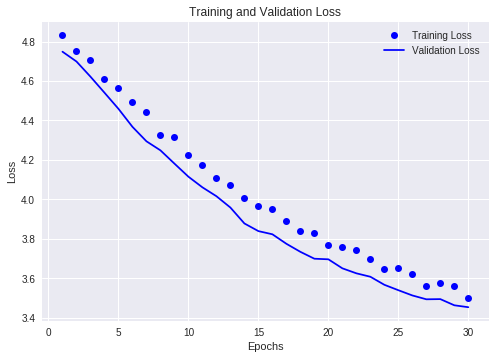

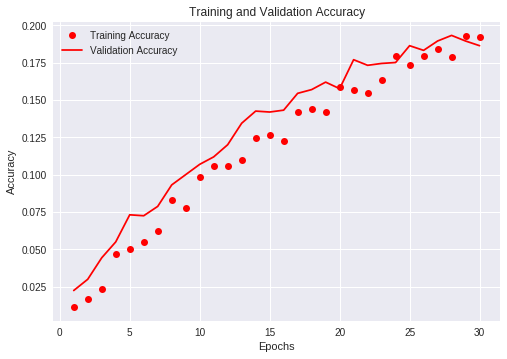

In [0]:
plot_from_history(history)

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

model.save('dog_breeds_pretrained_v2.h5')
model.save('drive/models/dog_breeds_pretrained_v2.h5')

Epoch 1/30
100/100 [==============================] - 44s 441ms/step - loss: 3.4444 - acc: 0.2091 - val_loss: 3.3887 - val_acc: 0.2112
Epoch 2/30
100/100 [==============================] - 41s 410ms/step - loss: 3.4743 - acc: 0.1982 - val_loss: 3.4046 - val_acc: 0.1906
Epoch 3/30
100/100 [==============================] - 41s 411ms/step - loss: 3.4773 - acc: 0.2109 - val_loss: 3.3885 - val_acc: 0.2094
Epoch 4/30
 64/100 [==================>...........] - ETA: 10s - loss: 3.3967 - acc: 0.2124

100/100 [==============================] - 41s 414ms/step - loss: 3.4048 - acc: 0.2109 - val_loss: 3.3753 - val_acc: 0.2037
Epoch 5/30
100/100 [==============================] - 41s 413ms/step - loss: 3.3985 - acc: 0.2141 - val_loss: 3.3652 - val_acc: 0.2006
Epoch 6/30
100/100 [==============================] - 42s 415ms/step - loss: 3.4163 - acc: 0.2161 - val_loss: 3.3202 - val_acc: 0.2087
Epoch 7/30
 83/100 [=======================>......] - ETA: 5s - loss: 3.3611 - acc: 0.2154

100/100 [==============================] - 41s 412ms/step - loss: 3.3625 - acc: 0.2132 - val_loss: 3.3652 - val_acc: 0.2056
Epoch 8/30
100/100 [==============================] - 42s 417ms/step - loss: 3.3409 - acc: 0.2213 - val_loss: 3.3123 - val_acc: 0.2100
Epoch 9/30
100/100 [==============================] - 41s 411ms/step - loss: 3.3845 - acc: 0.2203 - val_loss: 3.3298 - val_acc: 0.2050
Epoch 10/30
 86/100 [========================>.....] - ETA: 4s - loss: 3.3453 - acc: 0.2213

100/100 [==============================] - 41s 411ms/step - loss: 3.3408 - acc: 0.2194 - val_loss: 3.3015 - val_acc: 0.2062
Epoch 11/30
100/100 [==============================] - 42s 416ms/step - loss: 3.2772 - acc: 0.2288 - val_loss: 3.3145 - val_acc: 0.2075
Epoch 12/30
 95/100 [===========================>..] - ETA: 1s - loss: 3.3194 - acc: 0.2241

KeyboardInterrupt: ignored